## Notebook for ELG failure rate exploration

In [21]:
import numpy as np
import fitsio
from matplotlib import pyplot as plt
import os
from astropy.table import Table,join,unique
from scipy.special import erf
from desitarget.sv3 import sv3_targetmask
from desitarget import targetmask

In [23]:
arz = Table.read('/global/cfs/cdirs/desi/users/raichoor/everest/sv3-elg-everest-tiles.fits')

In [24]:
ff = fitsio.read('/global/cfs/cdirs/desi/users/raichoor/everest/sv3-elg-everest-tiles.fits')

welg &= ff['COADD_FIBERSTATUS'] == 0
st = []
for i in range(0,len(ff)):
    st.append(ff['SUBSET'][i][:4])
st = np.array(st)
welg &= st == "thru" #this selection obtains the cumulative data used in daily catalogs but reprocessed in everest
ff = ff[welg]
o2c = np.log10(ff['OII_FLUX'] * np.sqrt(ff['OII_FLUX_IVAR']))+0.2*np.log10(ff['DELTACHI2'])

In [25]:
arz['o2c'] = o2c

ValueError: Inconsistent data column lengths

In [18]:
wtp = ff['PRIORITY'] == 103100

wz = o2c > 0.9
print(len(ff[wz&wtp]),len(ff[wtp]))

220411 306972


In [13]:
wg = arz['COADD_FIBERSTATUS'] == 0
st = []
for i in range(0,len(arz)):
    st.append(arz['SUBSET'][i][:4])
st = np.array(st)
wg &= st == "thru"
arz = arz[wg]
print(len(arz))
tsel = arz['PRIORITY'] < 103000
print(len(arz[tsel]),len(np.unique(arz['TARGETID'])))

566662
151993 391262


In [129]:
#combine info together to get Anand's criteria for selecting good redshifts
arz['o2c'] = np.log10(arz['OII_FLUX'] * np.sqrt(arz['OII_FLUX_IVAR']))+0.2*np.log10(arz['DELTACHI2'])

In [122]:
#assign nans a low value that will get cut
w = (arz['o2c']*0) != 0
arz['o2c'][w] = -20

In [101]:
arzo = Table.read('/global/homes/r/raichoor/sv3/sv3-elg-daily-thru20210610.fits')

In [102]:
wg = arzo['FIBERSTATUS'] == 0
arzo = arzo[wg]
#combine info together to get Anand's criteria for selecting good redshifts
arzo['o2c'] = np.log10(arzo['FOII']/arzo['FOII_ERR'])+0.2*np.log10(arzo['DELTACHI2']) 
#assign nans a low value that will get cut
w = (arzo['o2c']*0) != 0
arzo['o2c'][w] = -20

<ipython-input-102-8fe5b1bfa6f0>:4: RuntimeWarning: invalid value encountered in true_divide
  arzo['o2c'] = np.log10(arzo['FOII']/arzo['FOII_ERR'])+0.2*np.log10(arzo['DELTACHI2'])
<ipython-input-102-8fe5b1bfa6f0>:4: RuntimeWarning: divide by zero encountered in log10
  arzo['o2c'] = np.log10(arzo['FOII']/arzo['FOII_ERR'])+0.2*np.log10(arzo['DELTACHI2'])
<ipython-input-102-8fe5b1bfa6f0>:4: RuntimeWarning: invalid value encountered in log10
  arzo['o2c'] = np.log10(arzo['FOII']/arzo['FOII_ERR'])+0.2*np.log10(arzo['DELTACHI2'])
<ipython-input-102-8fe5b1bfa6f0>:6: RuntimeWarning: invalid value encountered in multiply
  w = (arzo['o2c']*0) != 0


In [103]:
print(len(arzo),len(arz))

569112 566662


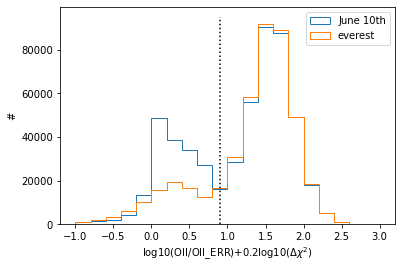

In [130]:
plt.hist(arzo['o2c'],histtype='step',bins=20,range=(-1,3),label='June 10th')
plt.hist(arz['o2c'],histtype='step',bins=20,range=(-1,3),label='everest')
plt.xlabel(r'log10(OII/OII_ERR)+0.2log10($\Delta\chi^2$)')
plt.ylabel('#')
plt.legend()
xl = [0.9,0.9]
yl = [0,95000]
plt.plot(xl,yl,'k:')
plt.show()

<ipython-input-106-37975c2c730b>:1: RuntimeWarning: overflow encountered in multiply
  plt.hist(arzo['FOII']*1e17,histtype='step',bins=20,range=(0,50),label='May 21 x 10^17')


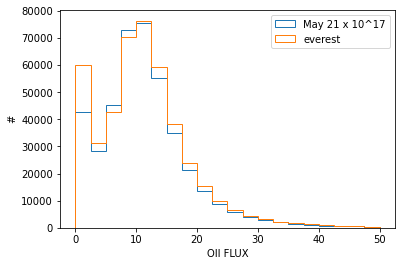

In [106]:
plt.hist(arzo['FOII']*1e17,histtype='step',bins=20,range=(0,50),label='May 21 x 10^17')
plt.hist(arz['OII_FLUX'],histtype='step',range=(0,50),bins=20,label='everest')
plt.xlabel('OII FLUX')
plt.ylabel('#')
plt.legend()
plt.show()


xl = [0.9,0.9]
yl = [0,95000]
#plt.plot(xl,yl,'k:')


<ipython-input-112-b5ceca1baf23>:1: RuntimeWarning: overflow encountered in multiply
  plt.hist(arzo['FOII_ERR']*2e17,histtype='step',bins=20,range=(0,15),label='June 10th x 2e17')


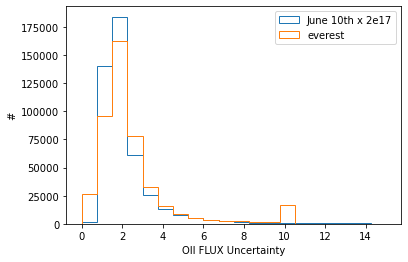

In [112]:
plt.hist(arzo['FOII_ERR']*2e17,histtype='step',bins=20,range=(0,15),label='June 10th x 2e17')
plt.hist(arz['OII_SIGMA'],histtype='step',range=(0,15),bins=20,label='everest')
plt.xlabel('OII FLUX Uncertainty')
plt.ylabel('#')
plt.legend()
plt.show()


In [82]:
arzo.dtype.names

('TARGETID',
 'CHI2',
 'COEFF',
 'Z',
 'ZERR',
 'ZWARN',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'NUMEXP',
 'NUMTILE',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MASKBITS',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'BRICKNAME',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TA

In [132]:
tj = join(arzo,arz,keys=['TARGETID','TILEID'])
print(len(tj))

565574


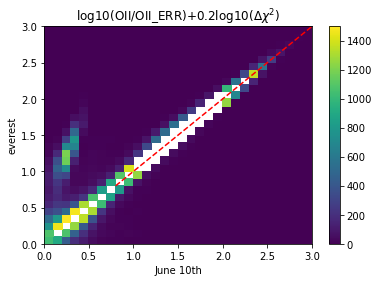

In [134]:
#sel = tj['o2c_1'] > 0.9
#plt.plot(tj[sel]['o2c_1'],tj[sel]['o2c_2'],'k.')
plt.hist2d(tj['o2c_1'],tj['o2c_2'],range=[[0,3],[0,3]],bins=30,cmax=1500)
#plt.xlim(0.9,3)
#plt.ylim(0.9,3)
xl = [0.8,3]
plt.plot(xl,xl,'r--')
#plt.plot(xl,np.array(xl)-.4,'k--')
plt.colorbar()
plt.xlabel('June 10th')
plt.ylabel('everest')
plt.title(r'log10(OII/OII_ERR)+0.2log10($\Delta\chi^2$)')
plt.show()

In [44]:
np.corrcoef(tj['o2c_1'],tj['o2c_2'])

array([[1.        , 0.26793107],
       [0.26793107, 1.        ]])

In [8]:
np.unique(arz['PRIORITY'])

2
83000
83100
83300
93000
93100
93300
103000
103100
103200
103350


In [ ]:
zmin = 0.8
zmax = 1.6
for ps in ['N','S']:
    wgh = (arz['o2c'] > 0.9)
    wa = ((arz['PRIORITY'] == 103000) | (arz['PRIORITY'] == 103100))
    #wa = arz['LOCATION_ASSIGNED'] == 1
    wa &= arz['TSNR2_ELG'] != 1e20
    wa &= arz['TSNR2_ELG'] != -99.0
    wa &= arz['PHOTSYS'] == ps
    wgh &= arz['Z'] > zmin
    wgh &= arz['Z'] < zmax

    wgh &= wa
    ffo = arz[wa]
    ffz = arz[wgh]
    a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(50,200))
    b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
    #plt.clf()
    plt.errorbar(a[1][:-1],a[0]/b[0],np.sqrt(a[0])/b[0],label=ps)#,fmt='ko')
vs = np.arange(50,200,1)
ol = np.ones(len(vs))*0.54
plt.plot(vs,ol,'k:')
plt.title('ELG')
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed')
plt.legend(loc='upper left')
plt.show()   

### surprisingly constant above ~ 100, pretty similar in N/S

### combining N/S, selecting to HIP and removing QSO

199494.0


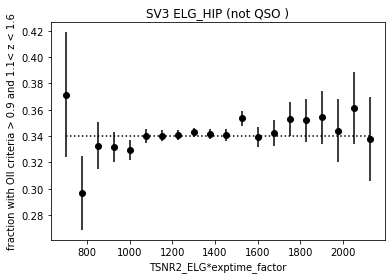

In [184]:
zmin = 1.1
zmax = 1.6
efac = 8.60
wgh = (arz['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= ((arz['PRIORITY'] == 103000) | (arz['PRIORITY'] == 103100))
wa &= arz['TSNR2_ELG'] != -99.0
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(75,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.558
ds = a[0]/b[0]#/fr
es = np.sqrt(b[0]-a[0])/b[0]#/fr
bs = 250/20

vs = (a[1][:-1]+bs/2.)*efac
plt.errorbar(vs,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.52
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
#plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/16')
plt.plot(vs,ol*.34,'k:')
plt.title('SV3 ELG_HIP (not QSO )')#+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_factor')
plt.ylabel('fraction with OII criteria > 0.9 and '+str(zmin)+'< z < '+str(zmax))# / '+str(fr))
#plt.legend(loc='lower right')
plt.show() 

76442.0


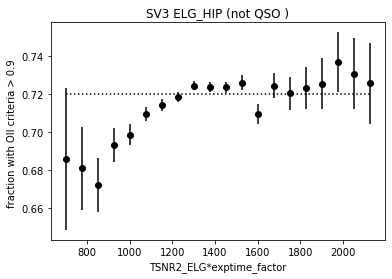

In [213]:
zmin = 0.8
zmax = 1.6
efac = 8.60
wgh = (arz['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= ( (arz['PRIORITY'] == 103100))
wa &= arz['TSNR2_ELG'] != -99.0
wa &= arz['PETAL_LOC'] != 9
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
#wgh &= arz['Z'] > zmin
#wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(75,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.558
ds = a[0]/b[0]#/fr
es = np.sqrt(b[0]-a[0])/b[0]#/fr
bs = 250/20

vs = (a[1][:-1]+bs/2.)*efac
plt.errorbar(vs,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.52
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
#plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/16')
plt.plot(vs,ol*.72,'k:')
plt.title('SV3 ELG_HIP (not QSO )')#+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_factor')
plt.ylabel('fraction with OII criteria > 0.9 ')# / '+str(fr))
#plt.legend(loc='lower right')
plt.show() 

106832.0


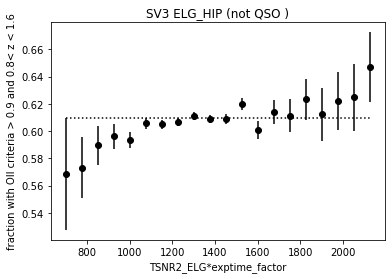

In [217]:
zmin = 0.8
zmax = 1.6
efac = 8.60
wgh = (arz['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= ((arz['PRIORITY'] == 103000) | (arz['PRIORITY'] == 103100))
wa &= arz['TSNR2_ELG'] != -99.0
wa &= arz['PETAL_LOC'] != 8
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(75,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.558
ds = a[0]/b[0]#/fr
es = np.sqrt(b[0]-a[0])/b[0]#/fr
bs = 250/20

vs = (a[1][:-1]+bs/2.)*efac
plt.errorbar(vs,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.52
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
#plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/16')
plt.plot(vs,ol*.61,'k:')
plt.title('SV3 ELG_HIP (not QSO )')#+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_factor')
plt.ylabel('fraction with OII criteria > 0.9 and '+str(zmin)+'< z < '+str(zmax))# / '+str(fr))
#plt.legend(loc='lower right')
plt.show() 

10015.0


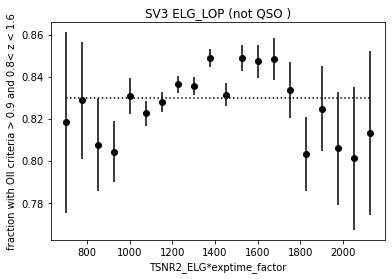

In [162]:
zmin = 0.8
zmax = 1.6
efac = 8.60
wgh = (arz['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= ((arz['PRIORITY'] == 103000))# | (arz['PRIORITY'] == 103100))
wa &= arz['TSNR2_ELG'] != -99.0
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(75,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.558
ds = a[0]/b[0]#/fr
es = np.sqrt(b[0]-a[0])/b[0]#/fr
bs = 250/20

vs = (a[1][:-1]+bs/2.)*efac
plt.errorbar(vs,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.52
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
#plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/16')
plt.plot(vs,ol*.83,'k:')
plt.title('SV3 ELG_LOP (not QSO )')#+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_factor')
plt.ylabel('fraction with OII criteria > 0.9 and '+str(zmin)+'< z < '+str(zmax))# / '+str(fr))
#plt.legend(loc='lower right')
plt.show() 

## Notebook for ELG failure rate exploration

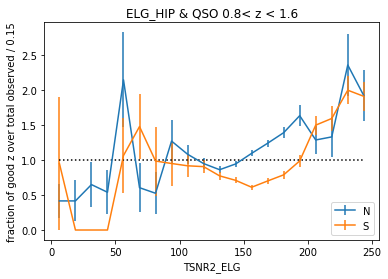

In [8]:
zmin = 0.8
zmax = 1.6
for ps in ['N','S']:
    wgh = (arz['o2c'] > 0.9) | ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
    wa = arz['TSNR2_ELG'] != 1e20
    wa &= arz['TSNR2_ELG'] != -99.0
    wa &= arz['PHOTSYS'] == ps
    wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) > 0)
    wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
    wgh &= wa
    wgh &= arz['Z'] > zmin
    wgh &= arz['Z'] < zmax
    ffo = arz[wa]
    ffz = arz[wgh]
    a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(0,250))
    b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
    fr = 0.15
    ds = a[0]/b[0]/fr
    es = np.sqrt(a[0])/b[0]/fr
    bs = 250/20
    plt.errorbar(a[1][:-1]+bs/2.,ds,es,label=ps)#,fmt='ko')
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
el[wl] = 0.52
plt.plot(vs,ol,'k:')
plt.title('ELG_HIP & QSO '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed / '+str(fr))
plt.legend(loc='lower right')
plt.show() 

### quasar targets are obviously quite different from non-quasars!

## see how things vary in redshift bins, keep ERF part constant (i.e., how bad would things be if we just have one model in the whole range)

25.478454057290666


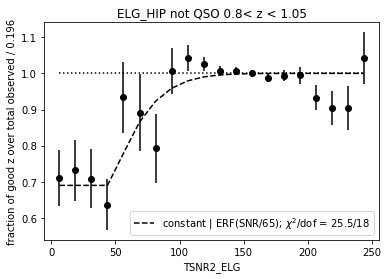

In [13]:
zmin = 0.8
zmax = 1.05
wgh = (arz['o2c'] > 0.9) | ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= arz['TSNR2_ELG'] != -99.0
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(0,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.196
ds = a[0]/b[0]/fr
es = np.sqrt(a[0])/b[0]/fr
bs = 250/20
plt.errorbar(a[1][:-1]+bs/2.,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.69
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/18')
plt.plot(vs,ol,'k:')
plt.title('ELG_HIP not QSO '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed / '+str(fr))
plt.legend(loc='lower right')
plt.show() 

25.32663860295442


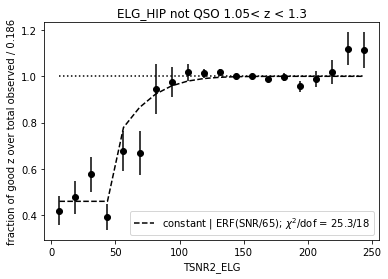

In [14]:
zmin = 1.05
zmax = 1.3
wgh = (arz['o2c'] > 0.9) | ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= arz['TSNR2_ELG'] != -99.0
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(0,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.186
ds = a[0]/b[0]/fr
es = np.sqrt(a[0])/b[0]/fr
bs = 250/20
plt.errorbar(a[1][:-1]+bs/2.,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.46
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/18')
plt.plot(vs,ol,'k:')
plt.title('ELG_HIP not QSO '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed / '+str(fr))
plt.legend(loc='lower right')
plt.show() 

33.00933376635402


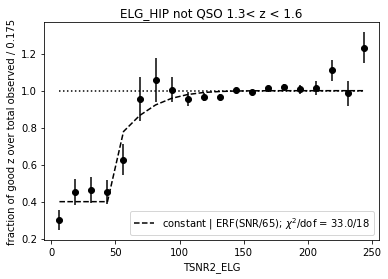

In [15]:
zmin = 1.3
zmax = 1.6
wgh = (arz['o2c'] > 0.9) | ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= arz['TSNR2_ELG'] != -99.0
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(0,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.175
ds = a[0]/b[0]/fr
es = np.sqrt(a[0])/b[0]/fr
bs = 250/20
plt.errorbar(a[1][:-1]+bs/2.,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.4
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/18')
plt.plot(vs,ol,'k:')
plt.title('ELG_HIP not QSO '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed / '+str(fr))
plt.legend(loc='lower right')
plt.show() 

### that chi2 is a bit worse and it looks like more of a trend from low to high tsnr, test other fit below

33.00933376635402
14.952979112686457


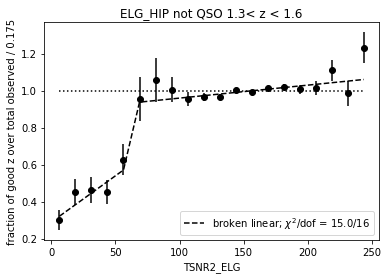

In [16]:
zmin = 1.3
zmax = 1.6
wgh = (arz['o2c'] > 0.9) | ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arz['TSNR2_ELG'] != 1e20
wa &= arz['TSNR2_ELG'] != -99.0
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arz['Z'] > zmin
wgh &= arz['Z'] < zmax
ffo = arz[wa]
ffz = arz[wgh]
a = np.histogram(ffz['TSNR2_ELG'],bins=20,range=(0,250))
b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
fr = 0.175
ds = a[0]/b[0]/fr
es = np.sqrt(a[0])/b[0]/fr
bs = 250/20
plt.errorbar(a[1][:-1]+bs/2.,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
vs = a[1][:-1]+bs/2.
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.4
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
el1 = 0.29+0.3/60.*vs
el2 = 0.89+0.07/100.*vs
wsp =  vs < 60
el2[wsp] = el1[wsp]
chi22 = np.sum(((ds-el2)/es)**2.)
print(chi2)
print(chi22)
plt.plot(vs,el2,'k--',label='broken linear; $\chi^2$/dof = '+str(round(chi22,1))+'/16')
plt.plot(vs,ol,'k:')
plt.title('ELG_HIP not QSO '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed / '+str(fr))
plt.legend(loc='lower right')
plt.show() 

### so for the high redshift bin we can get a better fit with the linear model instead of ERF

(array([     0.,      0.,  35659., 141428.,  50761.,  22736.,  12404.,
          7136.,   4828.,   3283.,   2565.,   2162.,   1699.,   1350.,
          1280.,   1132.,   1192.,    916.,    850.,    719.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 , 0.825, 0.9  , 0.975, 1.05 , 1.125, 1.2  , 1.275,
        1.35 , 1.425, 1.5  ], dtype=float32),
 <a list of 20 Patch objects>)

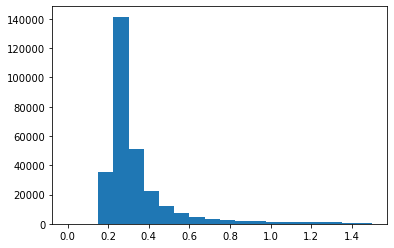

In [19]:
plt.hist(arz['FIBERFLUX_G'],bins=20,range=(0,1.5))

In [19]:
arz.columns

<TableColumns names=('TARGETID','CHI2','COEFF','Z','ZERR','ZWARN','NPIXELS','SPECTYPE','SUBTYPE','NCOEFF','DELTACHI2','PETAL_LOC','DEVICE_LOC','LOCATION','FIBER','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','LAMBDA_REF','FA_TARGET','FA_TYPE','OBJTYPE','FIBERASSIGN_X','FIBERASSIGN_Y','PRIORITY','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKID','BRICK_OBJID','MORPHTYPE','FLUX_G','FLUX_R','FLUX_Z','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','MASKBITS','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','BRICKNAME','EBV','FLUX_W1','FLUX_W2','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','SV3_DESI_TARGET','SV3_BGS_TARGET','SV3_MWS_TARGET','SV3_SCND_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','PLATE_RA','PLATE_DEC','TILEID','COADD_NUMEXP','COADD_EXPTIME','COADD

306895
177041
306895
129854


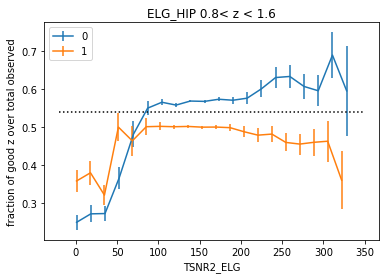

In [24]:
zmin = 0.8
zmax = 1.6
#for ps in ['N','S']:
for fm in [0,1]:
    wgh = (arz['o2c'] > 0.9) | ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
    #wa = arz['LOCATION_ASSIGNED'] == 1
    wa = arz['TSNR2_ELG'] != 1e20
    wa &= arz['TSNR2_ELG'] != -99.0
    #wa &= arz['PHOTSYS'] == ps
    print(len(arz[wa]))
    if fm == 0:
        wa &= arz['FIBERFLUX_G'] < 0.3
    if fm == 1:
        wa &= arz['FIBERFLUX_G'] > 0.3
    print(len(arz[wa]))
    wgh &= wa
    wgh &= arz['Z'] > zmin
    wgh &= arz['Z'] < zmax
    ffo = arz[wa]
    ffz = arz[wgh]
    a = np.histogram(ffz['TSNR2_ELG'],bins=20)
    b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
    #plt.clf()
    plt.errorbar(a[1][:-1],a[0]/b[0],np.sqrt(a[0])/b[0],label=str(fm))#,fmt='ko')
vs = np.arange(-20,350,1)
ol = np.ones(len(vs))*0.54
plt.plot(vs,ol,'k:')
plt.title('ELG_HIP '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG')
plt.ylabel('fraction of good z over total observed')
plt.legend(loc='upper left')
plt.show()   

In [169]:
dt = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/dark_targets.fits')
dt.keep_columns(['TARGETID','MW_TRANSMISSION_G'])
arzj = join(arz,dt,keys=['TARGETID'],join_type='left')
print(len(arz),len(arzj))

566662 566662


306972
167536
306972
139436


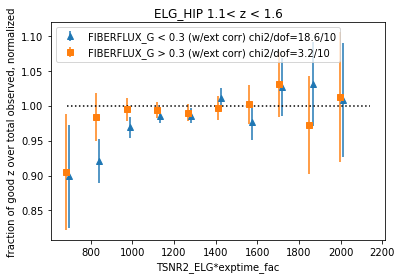

In [181]:
efac = 8.60
zmin = 1.1
zmax = 1.6
#for ps in ['N','S']:
fg = arzj['FIBERFLUX_G']/arzj['MW_TRANSMISSION_G']
for fm in [0,1]:
    wgh = (arzj['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
    #wa = arz['LOCATION_ASSIGNED'] == 1
    wa = arzj['TSNR2_ELG'] != 1e20
    wa &= arzj['TSNR2_ELG'] != -99.0
    wa &= ( (arzj['PRIORITY'] == 103100))
    #wa &= arz['PHOTSYS'] == ps
    print(len(arzj[wa]))
    if fm == 0:
        wa &= fg < 0.3
        fr = .35
        lb = 'FIBERFLUX_G < 0.3 (w/ext corr)'
        ng = 7.5
        mt = '^'
    if fm == 1:
        wa &= fg > 0.3
        fr = .34
        lb = 'FIBERFLUX_G > 0.3 (w/ext corr)'
        ng = -7.5
        mt = 's'
    print(len(arz[wa]))
    wgh &= wa
    wgh &= arzj['Z'] > zmin
    wgh &= arzj['Z'] < zmax
    ffo = arzj[wa]
    ffz = arzj[wgh]
    a = np.histogram(ffz['TSNR2_ELG'],bins=10,range=(80,250))
    b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
    #plt.clf()
    dl = a[0]/b[0]/fr
    el = np.sqrt(b[0]-a[0])/b[0]/fr
    chi2 = np.sum((dl-1.)**2./el**2.)
    plt.errorbar(a[1][:-1]*efac+ng,dl,el,label=lb+' chi2/dof='+str(round(chi2,1))+'/10',fmt=mt)#,fmt='ko')
vs = np.arange(80,250,1)
ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.title('ELG_HIP '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_fac')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  

In [36]:
wt = arz['TSNR2_ELG'] > 80
print(len(arz[wt]),len(arz),len(arz[wt])/len(arz))
lut = len(np.unique(arz[wt]['TARGETID']))
lu = len(np.unique(arz['TARGETID']))
print(lut,lu,lut/lu)

302630 307017 0.9857108889735747
243024 245996 0.9879185027398819


In [186]:
arzm = Table.read('/global/cfs/cdirs/desi/users/raichoor/everest/main-elg-everest-healpix.fits')

In [187]:
arzm.dtype.names

('TARGETID',
 'CHI2',
 'COEFF',
 'Z',
 'ZERR',
 'ZWARN',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'COADD_FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MASKBITS',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'BRICKNAME',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'PLATE_RA',
 'PLATE_DEC',
 'COADD_NUMEXP',
 'COADD_EXPTIME',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'MEAN_DELTA_X',
 'RMS_

In [189]:
np.unique(arzm['ELG_LOP'])

False
True


In [190]:
arzm['o2c'] = np.log10(arzm['OII_FLUX'] * np.sqrt(arzm['OII_FLUX_IVAR']))+0.2*np.log10(arzm['DELTACHI2'])

In [20]:
zmin = 1.1
zmax = 1.6
efac = 8.60
wgh = (arzm['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
wa = arzm['COADD_FIBERSTATUS'] == 0
wa &= arzm['ELG_LOP']
wa &= ((arzm['DESI_TARGET'] & targetmask.desi_mask['QSO']) == 0)
wa &= arzm['TSNR2_ELG'] != -99.0
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['QSO']) == 0)
#wa &= ((arz['SV3_DESI_TARGET'] & sv3_targetmask.desi_mask['ELG_HIP']) > 0)
wgh &= wa
wgh &= arzm['Z'] > zmin
wgh &= arzm['Z'] < zmax
ffo = arzm[wa]
ffz = arzm[wgh]
a = np.histogram(ffz['TSNR2_LRG'],bins=20,range=(75,250))
b = np.histogram(ffo['TSNR2_LRG'],bins=a[1])
fr = 0.558
ds = a[0]/b[0]#/fr
es = np.sqrt(b[0]-a[0])/b[0]#/fr
bs = 250/20

vs = (a[1][:-1]+bs/2.)*efac
plt.errorbar(vs,ds,es,fmt='ko')#,label=ps)#,fmt='ko')
ol = np.ones(len(vs))#*0.74
el = erf(vs/65)
wl = vs < 45
lm = 0.52
el[wl] = lm
chi2 = np.sum(((ds-el)/es)**2.)
print(chi2)
#plt.plot(vs,el,'k--',label='constant | ERF(SNR/65); $\chi^2$/dof = '+str(round(chi2,1))+'/16')
plt.plot(vs,ol*.33,'k:')
plt.title('Main ELG_LOP (not QSO )')#+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_factor')
plt.ylabel('fraction with OII criteria > 0.9 and '+str(zmin)+'< z < '+str(zmax))# / '+str(fr))
#plt.legend(loc='lower right')
plt.show() 

NameError: name 'arzm' is not defined

309255
167444
309255
141811


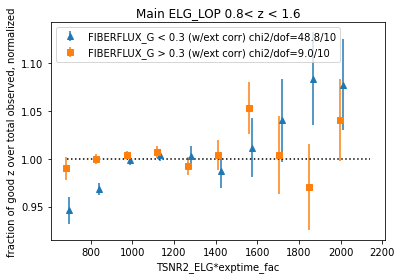

In [212]:
efac = 8.60
zmin = .8
zmax = 1.6
#for ps in ['N','S']:
fg = arzm['FIBERFLUX_G']/10**(-0.4*arzm['EBV']*3.214)
for fm in [0,1]:
    wgh = (arzm['o2c'] > 0.9) #| ((arz['ZWARN'] == 0) & (arz['Z'] > 1.55))
    wa = arzm['COADD_FIBERSTATUS'] == 0
    wa &= arzm['ELG_LOP']
    wa &= ((arzm['DESI_TARGET'] & targetmask.desi_mask['QSO']) == 0)
    wa &= arzm['TSNR2_ELG'] != -99.0
    print(len(arzm[wa]))
    if fm == 0:
        wa &= fg < 0.3
        fr = .555
        lb = 'FIBERFLUX_G < 0.3 (w/ext corr)'
        ng = 7.5
        mt = '^'
    if fm == 1:
        wa &= fg > 0.3
        fr = .615
        lb = 'FIBERFLUX_G > 0.3 (w/ext corr)'
        ng = -7.5
        mt = 's'
    print(len(arzm[wa]))
    wgh &= wa
    wgh &= arzm['Z'] > zmin
    wgh &= arzm['Z'] < zmax
    ffo = arzm[wa]
    ffz = arzm[wgh]
    a = np.histogram(ffz['TSNR2_ELG'],bins=10,range=(80,250))
    b = np.histogram(ffo['TSNR2_ELG'],bins=a[1])
    #plt.clf()
    dl = a[0]/b[0]/fr
    el = np.sqrt(b[0]-a[0])/b[0]/fr
    chi2 = np.sum((dl-1.)**2./el**2.)
    plt.errorbar(a[1][:-1]*efac+ng,dl,el,label=lb+' chi2/dof='+str(round(chi2,1))+'/10',fmt=mt)#,fmt='ko')
vs = np.arange(80,250,1)
ol = np.ones(len(vs))#*0.54
plt.plot(vs*efac,ol,'k:')
plt.title('Main ELG_LOP '+str(zmin)+'< z < '+str(zmax))
plt.xlabel('TSNR2_ELG*exptime_fac')
plt.ylabel('fraction of good z over total observed, normalized')
plt.legend(loc='upper left')
plt.show()  